# 3.5 Walkthrough: visualisation for data exploration

In this last section we are going dig back into our EQLTS survey dataset and use some of the data visualisation tools we covered in the previous sections to better understand our dataset. 

A reminder of our Research question:

> We want to investigate the contribution of material, occupational, and psychosocial factors on the self reported health (SRH) across different European countries. We will use SRH information collected by the Wave 2 and 3 of the EQLTS survey, aware that they offer only a partial representation of European populations and that SRH is per-se a highly subjective indicator, difficult to compare across countries.

  
```{admonition} Aldabe et al. recap

We are using the Aldabe et al. 2011, paper as a guideline into our analysis, let's have a quick recap. 
The study uses the following variables:

- The main model used socio-economic status information (occupation and education-level survey questions) and age to predict SRH (age was included to control for it).
- Additional models were tested that included a rather large list of _material_, _occupational_ and _psychosocial_ variables to test if they mediate the relationship. See Table 1 in the paper.
- The majority of responses were "good" health (81.14% of men; 76.91% of woman). 

We are interested in exploring predictors that are general (some of the questions are quite specific).
```

## Loading data

```{note}
The following material should look familiar after [Module 2's hands-on session](m2-handson). We repeat some necessary steps here so that this notebook can function as a standalone notebook. Note, however, that there will be some differences since the exploration was done by different people. 
```

We can access the data by downloading the `csv` option from [here](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=7724#!/details).
You would have downloaded a folder with the following directory structure. Here we have only listed the files which we will use:

```
- UKDA-7724-csv
    - csv # here is the data
        - eqls_2011.csv
    - mrdoc #here is additional info
        - allissue #data dictionaries
        - excel
            - eqls_api_map.csv # description of what the column names mean
            - eqls_concordance_grid.xlxs #described which variables were included in which waves and the mapping between waves
        - pdf # user guide
        - UKDA #study info
```

Unzip the data to `$PROJECT_ROOT/data` (where `$PROJECT_ROOT` is the root of the cloned github repository for this course).
This should give you `$PROJECT_ROOT/data/UKDA-7724-csv` directory.

In the data set there are 196 variables but many were not included in wave 3, `eqls_concordance_grid.xlsx` states which.

For simplicity in this course we will only use wave 3 data.

## Reading the data


Let's start reading wave 3 data `eqls_2011.csv`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
sns.set_style("white")

In [2]:
datafolder = '../../../data/UKDA-7724-csv/' # should match the path you unzipped the data to
df = pd.read_csv(datafolder + 'csv/eqls_2011.csv')

In [3]:
df.describe()

,Wave,Y11_Country,Y11_Q31,Y11_Q32,Y11_ISCEDsimple,Y11_Q49,Y11_Q67_1,Y11_Q67_2,Y11_Q67_3,Y11_Q67_4,...,DV_Q7,DV_Q67,DV_Q43Q44,DV_Q54a,DV_Q54b,DV_Q55,DV_Q56,DV_Q8,DV_Q10,RowID
count,43636.0,43636.000000,43392.000000,43410.000000,43545.000000,43541.000000,43636.000000,43636.000000,43636.000000,43636.000000,...,1131.000000,43636.000000,43214.000000,43636.000000,43636.000000,43636.000000,43636.000000,43636.000000,43636.000000,43636.00000
mean,3.0,17.317192,1.880969,1.573485,4.076886,2.671735,1.959368,1.023673,1.019204,1.001971,...,53.019452,1.086465,2.482390,2.815565,2.925635,0.303442,0.231437,3.931708,3.283482,57452.50000
std,0.0,9.470192,1.197339,1.268200,1.377113,0.972558,0.197437,0.152030,0.137244,0.044351,...,16.056085,0.460388,0.837227,0.721642,0.568403,0.881979,0.827727,0.436254,1.130667,12596.77251
min,3.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,35635.00000
25%,3.0,9.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,43.000000,1.000000,2.000000,3.000000,3.000000,0.000000,0.000000,4.000000,2.000000,46543.75000
50%,3.0,17.000000,1.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,...,51.000000,1.000000,3.000000,3.000000,3.000000,0.000000,0.000000,4.000000,4.000000,57452.50000
75%,3.0,26.000000,3.000000,2.000000,5.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,63.000000,1.000000,3.000000,3.000000,3.000000,0.000000,0.000000,4.000000,4.000000,68361.25000
max,3.0,34.000000,4.000000,5.000000,8.000000,4.000000,2.000000,2.000000,2.000000,2.000000,...,80.000000,6.000000,3.000000,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,79270.00000


## Variables, topics and groupings 

We have a large number of variables (196) with coded names. We need to use the `eqls_api_map.csv` to understand what each of these columns mean.

In [4]:
df_map = pd.read_csv(datafolder + 'mrdoc/excel/eqls_api_map.csv', encoding='latin1')

df_map.head(100)

,VariableName,VariableLabel,Question,TopicValue,KeywordValue,VariableGroupValue
0,Wave,EQLS Wave,EQLS Wave,NaN,NaN,Administrative Variables
1,Y11_Country,Country,Country,Geographies,NaN,Household Grid and Country
2,Y11_Q31,Marital status,Marital status,Social stratification and groupings - Family l...,Marital status,Family and Social Life
3,Y11_Q32,No. of children,Number of children of your own,Social stratification and groupings - Family l...,Children,Family and Social Life
4,Y11_ISCEDsimple,Education completed,Highest level of education completed,Education - Higher and further,Education levels,Education
...,...,...,...,...,...,...
95,Y11_Q25e,How much tension between different racial/ethn...,How much tension is there in this country: Dif...,Society and culture - Social attitudes and beh...,Disadvantaged groups,Quality of Society
96,Y11_Q25f,How much tension between different religious g...,How much tension is there in this country: Dif...,Society and culture - Social attitudes and beh...,Disadvantaged groups,Quality of Society
97,Y11_Q25g,How much tension between groups with different...,How much tension is there in this country: Gro...,Society and culture - Social attitudes and beh...,Disadvantaged groups,Quality of Society
98,Y11_Q28a,How much trust the parliament?,How much you personally trust: [NATIONALITY] p...,Society and culture - Social attitudes and beh...,Trust,Quality of Society


### Notes from the [User Guide](http://doc.ukdataservice.ac.uk/doc/7724/mrdoc/pdf/7724_eqls_2007-2011_user_guide_v2.pdf)


- Variables are grouped into primary and secondary **topics** (e.g. Education (primary) and Higher and further (secondary)).
- Variables are _also_ grouped into **variable groupings** which differ slightly from the topics. 

- The topics are an attempt to succinctly describe the semantic domain of each variable. The variable groupings are slightly overlapping with these topics (e.g Health crops up twice), but also includes indicators such as `Derived Variables`, which clearly is a technical grouping rather than a topic. 

Let's take a look at the grouping variables and see how many questions there are in each group.

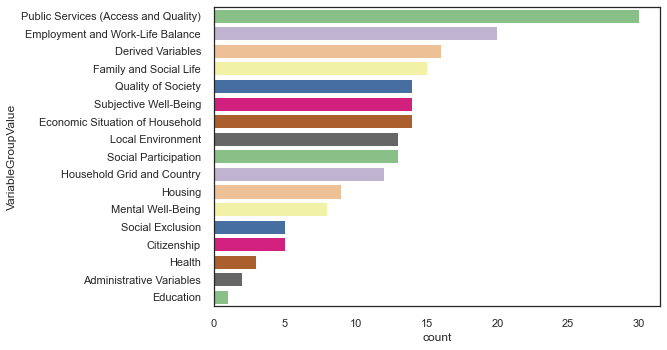

In [5]:
# all Groups
val = "VariableGroupValue"
sns.countplot(y=val, data=df_map, palette="Accent", order=df_map[val].value_counts().index)
plt.show()

`Public Services` are the group that has the highest number of questions associated to it, followed by `Employment and Work-Life Balance`. `Education` and `Health` appear to have just a few questions. 

Let's look now how the questions distribute around Topics.

/usr/local/anaconda3/envs/rds-course/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/envs/rds-course/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


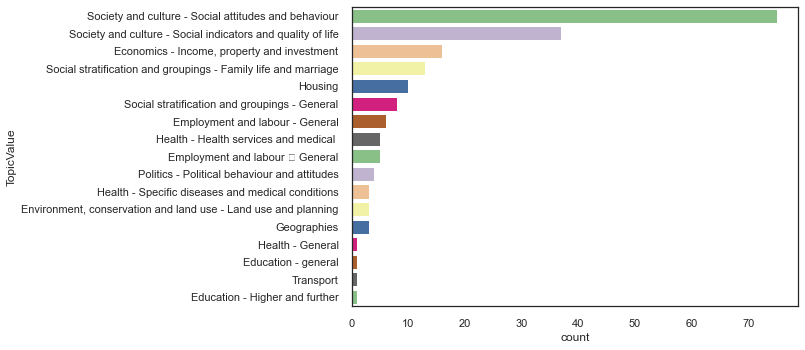

In [6]:
# all topics
val = "TopicValue"
sns.countplot(y=val, data=df_map, palette="Accent", order=df_map[val].value_counts().index)
plt.show()

Now, let's explore how the `TopicValue` and `VariableGroupValue` map to each other. 

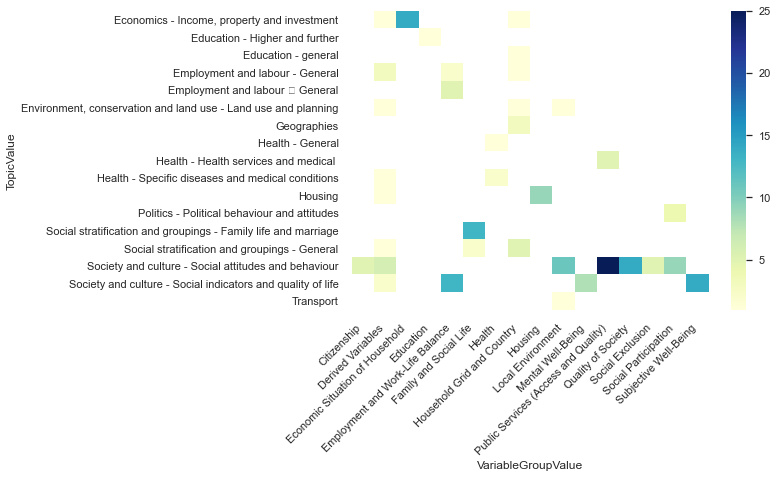

In [7]:
heatmap1_data = pd.pivot_table(df_map, index=['TopicValue'],values='VariableName',columns=['VariableGroupValue'], aggfunc=lambda x: len(x.unique()))
sns.heatmap(heatmap1_data, cmap="YlGnBu")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    #fontsize='x-large'  
)
plt.show()

As expected there is not a 1:1 mapping between these two categories.

So, what are we looking at here? We have a massive dataset that seems to have many questions on similar topics (for example there are over 70 questions on `Society and culture - Social attitudes and behaviour`). Dealing with this many variables will be cumbersome. It would be nice to have some way of aggregating amongst similar variables to simplify things.


Fortunately, the dataset contains `Derived Variables`. These "_group numeric responses of other related variables or to collapse groupings of related categorical variables into fewer categories_". In the words of the user guide, they aim to:   
- enhance the data quality by aggregating the responses into more usable and consistent format across both waves of the Survey   
- provide a clearer structure of the dataset by reducing the number of variables   
- ensure confidentiality and anonymity of personal information and all respondents   


The `Derived Variables` are not necessarily the most important questions, they simply occur when the are many related questions that can be aggregated. But also note from the above figure that `Derived Variables` have fairly good coverage across the topics (the only primary topics not covered are `Transport`, `Politics`, `Geographies`, and `Education`). 

`Derived Variables` could be a candidate subset of the data that we can explore and analyse.

But we want to map onto _material_, _occupational_, and _psychosocial_ factors. Do the topics covered in `Derived Variables` cover these? 

If we revisit the table above with some consideration we can sensibly group the derived variable topics as follows.

- Material
    - Economics - Income, property and investment
    - Environment, conservation and land use - Land use and planning
    - Housing
- Occupational
    - Employment and labour - General
- Psychosocial
    - Social stratification and groupings - General
    - Society and culture - Social attitudes and behaviour
    - Society and culture - Social indicators and quality of life
    - Health - Specific diseases and medical conditions

Let's have a closer look at these variables using `eqls_2011_ukda_data_dictionary.rtf`. 

```{admonition} Variable Selection
:class: note
The course concepts will be easier to deliver with a smaller dataset, so we picked the derived variables that aggregated many questions: `Y11_DeprIndex`, `Y11_Accommproblems`,`Y11_SocExIndex`, and `Y11_MWIndex`. To have a better spread across our _Material, Occupational, and Psychosocial_ categories we supplemented these with additional variables: `DV_Q7` (Working Hours), `Y11_Incomequartiles_percapita` (Income), `Y11_ISCEDsimple` (Education), and `DV_Q43Q44` (Health). We also included other key demographic information: `Y11_Agecategory` (Age), `Y11_Q31` (Marital Status), `Y11_Country` (Country).


In the hands-on sessions you will have the opportunity to explore variables beyond these.

```

#### Material Variables
- `Y11_Deprindex`:  `Y11_Q59a` to `Y11_Q59f` ask the question 'Can house afford it if you want it?', with six examples (home heating, holiday, replacing goods, good food, new clothes, hosting friends). The responses are categorical `1` (YES) or `2` (NO). The `Y11_Deprindex` is a count of the number of yes responses.
- `Y11_Accommproblems`: `Y11_Q19a` - `Y11_Q19f` asks a `1` (YES) or `2` (NO) question about accommodation problems, with six examples. This variable is a count.
- `Y11_Incomequartiles_percapita` ranges from 1 (1st quartile) to 4 (4th quartile). 
 
#### Occupational Variables
- `DV_Q7`: Count from a couple of working hours questions. Up to 80, otherwise labelled `80 hours or more`. 
- `Y11_ISCEDsimple`: Education levels based on the International Standard Classification of Education (ISCED). Ranges from 1-8. It's a little confusing that 1-7 is from zero to high education and 8 means N/A.

#### Pychosocial Variables
- `Y11_SocExIndex`: average score from four social exclusion question measures on a 5 scale response (1 = strongly disagree, 5 = strongly agree). 
- `Y11_MWIndex`: There is a set of five questions where the respondents state degree of agreement, measures on a six-point scale. The mental well-being scale converts these to a value between 0 - 100.
- `DV_Q43Q44`: Three categories: limiting, not limiting, no illness. 

So, this gives us **8 variables**, with at least two for each category. This is enough to play with and try to build a simple model (see Module 4).
 
#### Other
- Age (5 categories). `Y11_Agecategory`
- Gender. `Y11_HH2a`
- Marital Status. `Y11_Q31`. 
- Country. `Y11_Country`. 

To make the manipulation easier we select a subset of the data with only the variables we want and rename them into something more readable.

In [8]:
var_map = {"Y11_Q42": "SRH",
           'Y11_Deprindex': 'DeprIndex',
           "Y11_Accommproblems": 'AccomProblems',
           "Y11_Incomequartiles_percapita" : "IncomeQuartiles",
           "DV_Q7":"WorkingHours",
           "Y11_ISCEDsimple":"ISCED",
           "Y11_SocExIndex":"SocialExclusionIndex",
           "Y11_MWIndex": "MentalWellbeingIndex",
           "Y11_Agecategory":"AgeCategory",
           "Y11_HH2a":"Gender",
           "Y11_Q31":"MaritalStatus",
           "Y11_Country":"Country",
           "DV_Q43Q44": "ChronicHealth"
}

df.rename(columns=var_map, inplace=True)
df_set = df[var_map.values()]
df_set.head()

,SRH,DeprIndex,AccomProblems,IncomeQuartiles,WorkingHours,ISCED,SocialExclusionIndex,MentalWellbeingIndex,AgeCategory,Gender,MaritalStatus,Country,ChronicHealth
0,2.0,1.0,0.0,NaN,NaN,4.0,3.00,100.0,2,1,NaN,15,3.0
1,1.0,4.0,1.0,2.0,NaN,4.0,2.75,64.0,2,1,4.0,15,3.0
2,2.0,0.0,0.0,3.0,NaN,3.0,NaN,64.0,2,1,4.0,15,3.0
3,1.0,0.0,0.0,4.0,NaN,3.0,3.50,80.0,5,1,3.0,15,3.0
4,3.0,0.0,0.0,2.0,NaN,4.0,2.00,44.0,2,1,4.0,15,3.0


## Exploring different countries 

Our data contains 35 different european countries. Let's take a look at the differences of some of our variables of interest for the different countries in the data. 

First we need to map the country code values to their name:

In [9]:
default_factory={
            1.0: "Austria",
            2.0: "Belgium",
            3.0: "Bulgaria",
            4.0: "Cyprus",
            5.0: "Czech Republic",
            6.0: "Germany",
            7.0: "Denmark",
            8.0: "Estonia",
            9.0: "Greece",
            10.0: "Spain",
            11.0: "Finland",
            12.0: "France",
            13.0: "Hungary",
            14.0: "Ireland",
            15.0: "Italy",
            16.0: "Lithuania",
            17.0: "Luxembourg",
            18.0: "Latvia",
            19.0: "Malta",
            20.0: "Netherland",
            21.0: "Poland",
            22.0: "Portugal",
            23.0: "Romania",
            24.0: "Sweden",
            25.0: "Slovenia",
            26.0: "Slovakia",
            27.0: "UK",
            28.0: "Turkey",
            29.0: "Croatia",
            30.0: "Macedonia (FYROM)",
            31.0: "Kosovo",
            32.0: "Serbia",
            33.0: "Montenegro",
            34.0: "Iceland",
            35.0: "Norway",
        }

df_set["Country_cat"] = df_set["Country"].apply(lambda x: default_factory.get(x))

/var/folders/fc/ys01gk017lg3ylcvv2knwnkc0000gq/T/ipykernel_26776/4185535825.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_set["Country_cat"] = df_set["Country"].apply(lambda x: default_factory.get(x))


Let's compare the distributions of the Self Reported Health, Deprivation Index and Social Exclusion Index for the different countries. 

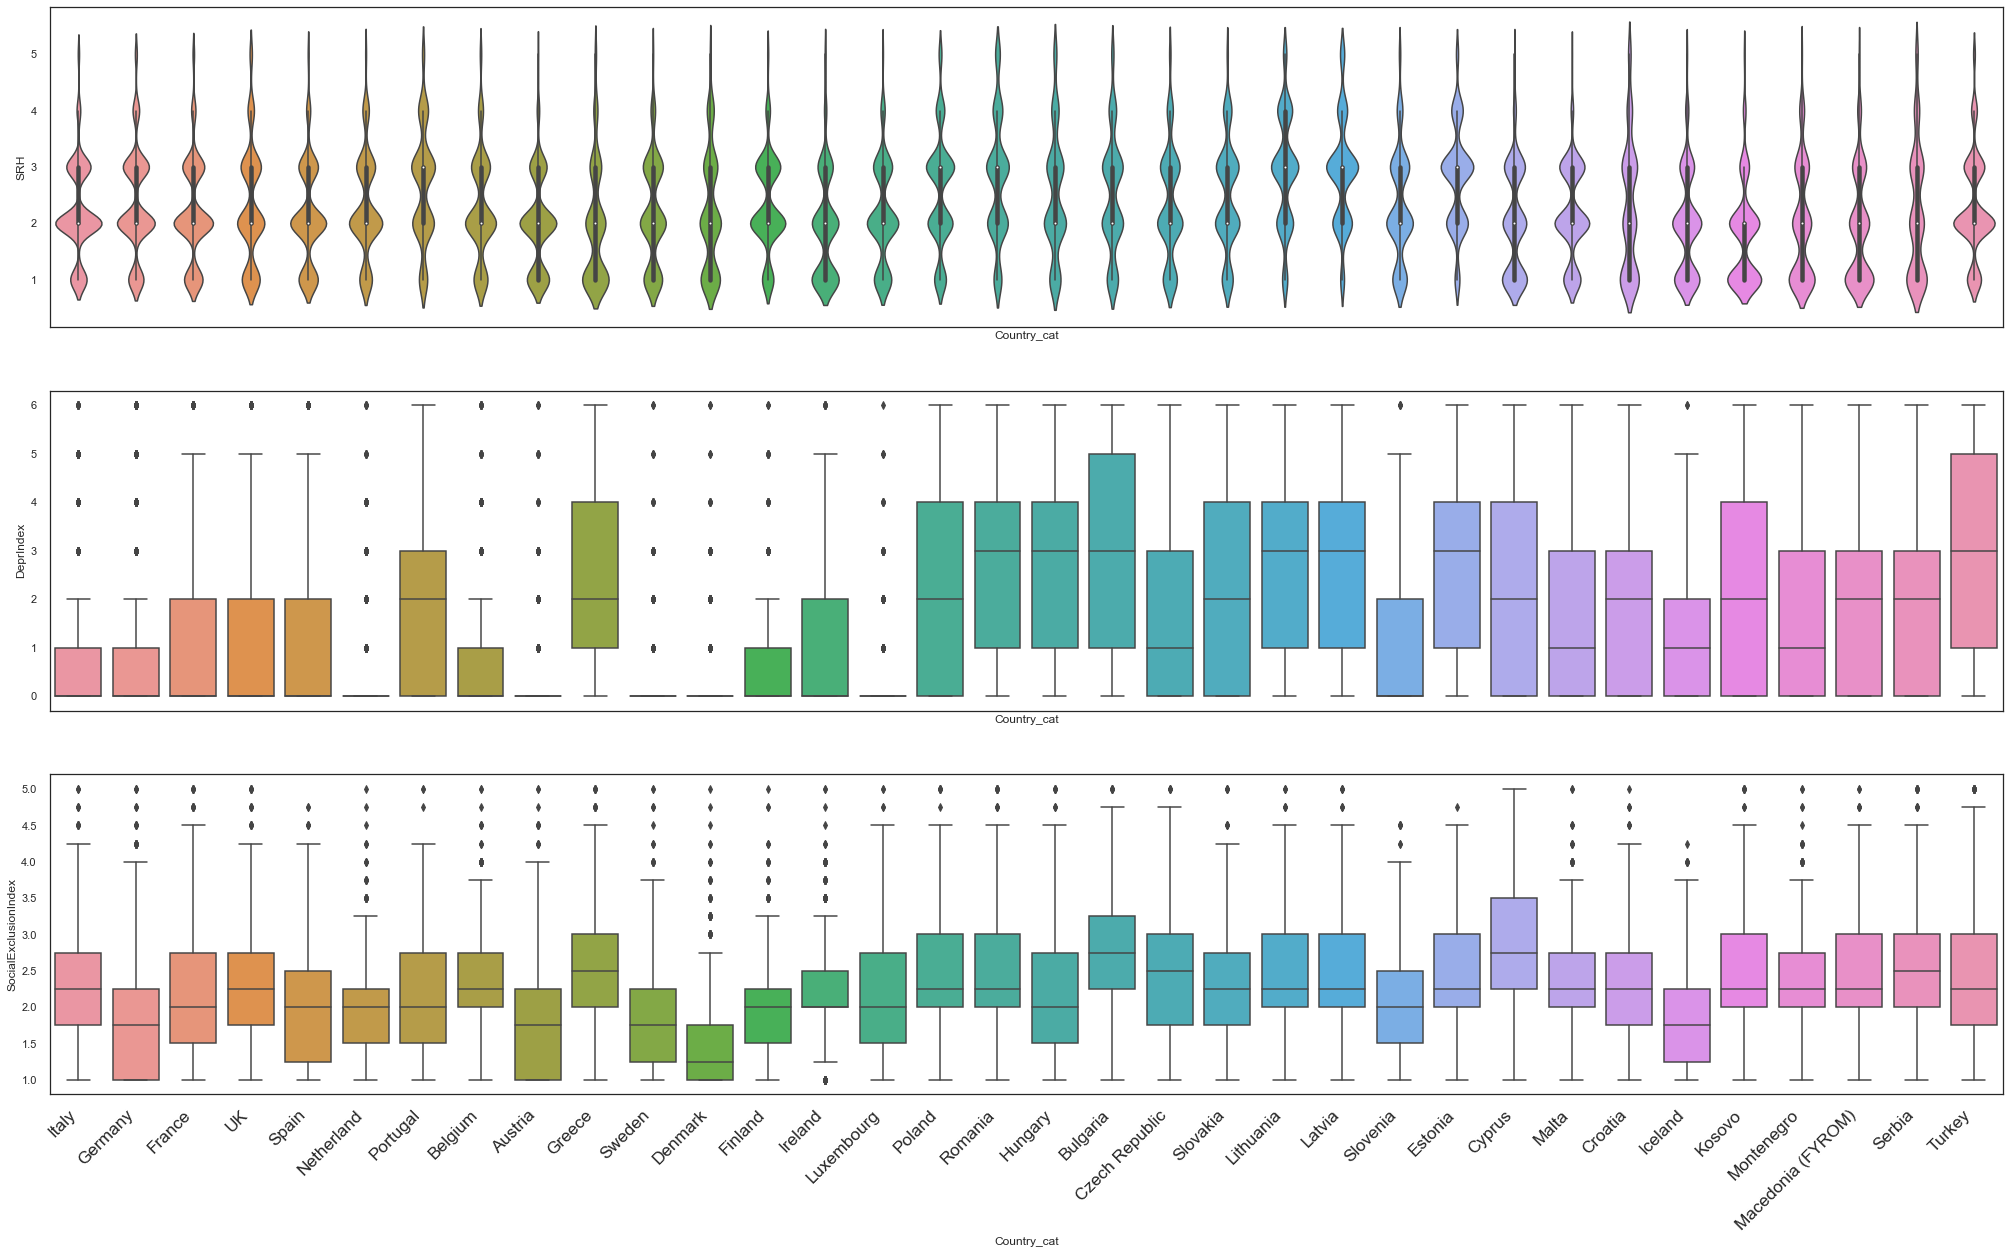

In [10]:
f, axes = plt.subplots(3,1,figsize =(35,20),sharex=True)

chart = sns.violinplot(x="Country_cat", y="SRH", data=df_set,ax=axes[0])
sns.boxplot(x="Country_cat", y="DeprIndex", data=df_set,ax=axes[1])
sns.boxplot(x="Country_cat", y="SocialExclusionIndex", data=df_set,ax=axes[2])
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
None 

In the figures above we can observe a large variability between the variables of interest for our study. Taking this into consideration, and for simplicity of the model we are going to build in Module 4 in the rest of this section we will focus only in one country, the UK.

In [11]:
df_uk = df_set.query('Country == 27')
df_uk.describe()

,SRH,DeprIndex,AccomProblems,IncomeQuartiles,WorkingHours,ISCED,SocialExclusionIndex,MentalWellbeingIndex,AgeCategory,Gender,MaritalStatus,Country,ChronicHealth
count,2251.000000,2111.000000,2242.000000,1695.000000,50.000000,2243.000000,2160.000000,2241.000000,2252.000000,2252.000000,2245.000000,2252.0,2238.000000
mean,2.298090,1.122217,0.481267,2.498525,40.840000,3.997771,2.323611,58.456046,3.566607,1.569272,1.928731,27.0,2.324397
std,1.025667,1.678759,0.874987,1.119154,16.377386,1.489030,0.813716,22.190912,1.221569,0.495288,1.169388,0.0,0.886114
min,1.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,27.0,1.000000
25%,2.000000,0.000000,0.000000,1.000000,29.500000,3.000000,1.750000,44.000000,3.000000,1.000000,1.000000,27.0,1.000000
50%,2.000000,0.000000,0.000000,2.000000,42.000000,3.000000,2.250000,64.000000,4.000000,2.000000,1.000000,27.0,3.000000
75%,3.000000,2.000000,1.000000,3.500000,50.000000,6.000000,2.750000,76.000000,5.000000,2.000000,3.000000,27.0,3.000000
max,5.000000,6.000000,6.000000,4.000000,80.000000,8.000000,5.000000,100.000000,5.000000,2.000000,4.000000,27.0,3.000000


## Missingness

Lets now investigate the missingness of our variables of interest. There are three categories of missing data: Missing Completely at Random (MCAR), Missing at Random (MAR), Missing Not at Random (MNAR). Understanding the type of missigness present in our dataset is fundamental to justify the use (or dismissal) of a variable in our model. Furthermore, it will help inform the strategy for any kind of imputation done to avoid missing useful data.

<Figure size 2880x2880 with 0 Axes>

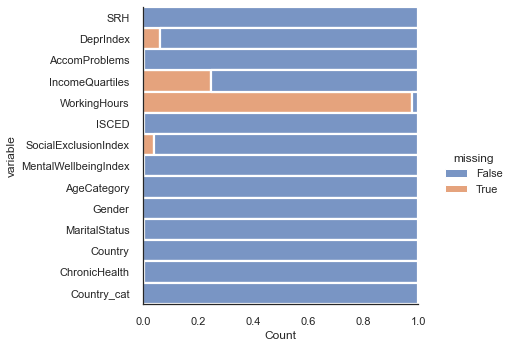

Percentage of missing values
SRH                     0.000444
DeprIndex               0.062611
AccomProblems           0.004440
IncomeQuartiles         0.247336
WorkingHours            0.977798
ISCED                   0.003996
SocialExclusionIndex    0.040853
MentalWellbeingIndex    0.004885
AgeCategory             0.000000
Gender                  0.000000
MaritalStatus           0.003108
Country                 0.000000
ChronicHealth           0.006217
Country_cat             0.000000
dtype: float64


In [12]:
# Following command shows missing/non-missing values in two colors.
plt.figure(figsize=(40,40))
sns.displot(
    data=df_uk.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25, 
)
plt.show()

print ('Percentage of missing values')
eqls_null_counts = df_uk.isnull().sum() / len(df_uk)
print(eqls_null_counts)

Working Hours is mostly missing. It is derived from two variables, `Y11_Q7`, `Y11_Q7b` (a secondary job). A reason for this is that if the person does not have a second job then the total working hours is given as NaN. Let's explore this further. 

In [13]:
df_hours = df[['WorkingHours','Y11_Q7','Y11_Q7b']]

<Figure size 2880x2880 with 0 Axes>

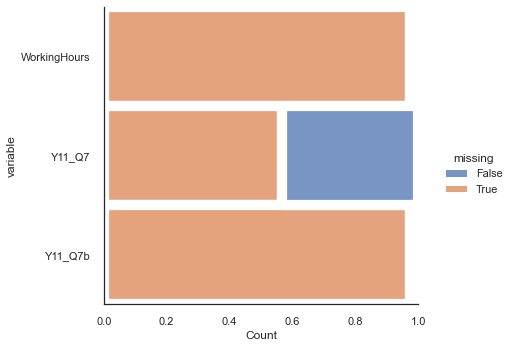

In [14]:
# Following command shows missing/non-missing values in two colors.
plt.figure(figsize=(40,40))
sns.displot(
    data=df_hours.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25, 
)
plt.show()

### Dealing with Missingness

In the figure above we can see that only about 40% of respondents filled out the working hours for the first job. Given the large amount of missing data for this variable is probably best to not use it. 

Similarly, about 24% of people do not have an estimated `IncomeQuartiles`. Perhaps these are also unemployed? We could impute, but even sophisticated imputation methods (such as drawing from a distribution specified by the existing values) will introduce randomness (unwanted noise) into the relationships across variables. We could calculate the covariance matrix of the existing data and use that to impute. But similarly that will artificially enhance existing relationships and mean that you are more prone to overfitting. 

If we decide to drop the rows with missing data we need to carefully balance any increase of noise by imputation to the loss of statistics of dropping these rows. Furthermore, a research data scientist on this project should try to work with domain experts to uncover if there were any systemic reasons why some entries were missing and therefore by dropping rows we are removing a sub-population from the dataset.

> For example, is it the people that do not have jobs that don't have incomes? Or perhaps jobless respondents are classed as the first quartile income and it is something else? This should be done before any imputation methods are considered so that we could assess the extent to which the imputation method is distorting both the distribution of the `IncomeQuartiles` predictor _and_ the joint distribution of `IncomeQuartiles` and the other variables.

In terms of the the missingness jargon mentioned above (MCAR, MAR, MNAR) the only place where is safe to either drop or blindly impute is when data is missing completely at random in a small scale. And this is almost **never** the case.

As we are lacking some of this information for this example and a a sceptic of adding data just to make your regression work we only select the data where `IncomeQuartiles` exists if I was to assess `IncomeQuartiles` as a variable.

Let's compare `IncomeQuartiles` to `DeprIndex`. They both speak to finances and `DeprIndex` could be used as a replacement.



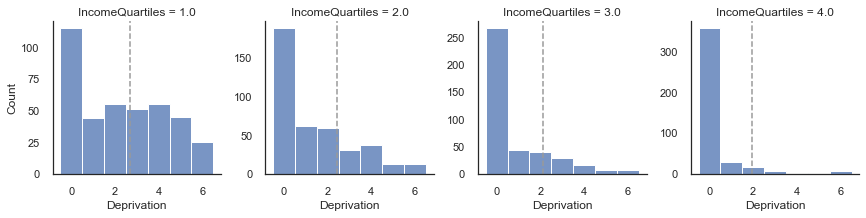

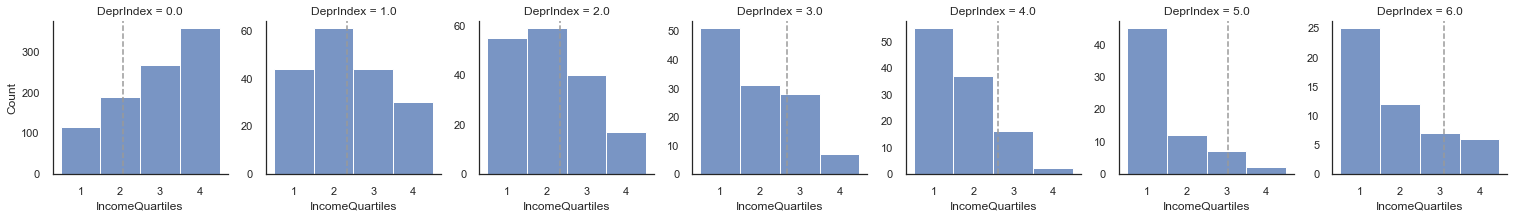

                 IncomeQuartiles  DeprIndex
IncomeQuartiles         1.000000  -0.441867
DeprIndex              -0.441867   1.000000


In [15]:
def plot_mean(data, **kws):
    mn = np.nanmean(data.SRH.values)
    ax = plt.gca()
    ax.axvline(mn, c = (.6,.6,.6), ls ='--')

g = sns.FacetGrid(df_uk, col="IncomeQuartiles", sharey=False)
g.map_dataframe(sns.histplot, 'DeprIndex',binwidth=1,binrange=[-0.5,6.5])

    
g.map_dataframe(plot_mean)
g.set_axis_labels("Deprivation", "Count")
plt.show()

g = sns.FacetGrid(df_uk, col="DeprIndex", sharey=False)
g.map_dataframe(sns.histplot, 'IncomeQuartiles',binwidth=1,binrange=[0.5,4.5])

    
g.map_dataframe(plot_mean)
g.set_axis_labels("IncomeQuartiles", "Count")
plt.show()

print(df_uk[['IncomeQuartiles','DeprIndex']].corr(method='spearman'))


From the above figure we can see that the distribution of `DeprIndex` shifts to the left as the income quartile increases (even though zero is the mode throughout). We have plotted it both ways round so better see the relationship. 

Though with such a small range of values a correlation is a little unreliable (and is pushed to lower values), we use Spearman's rank correlation as a rough assessment of whether scoring higher on `IncomeQuartiles` means that one scores higher on the `DeprIndex`. You can see that the correlation is -0.4. This correlation will be dampened by the mode being zero on the `DeprIndex`.

There is a low amount of data missing in the other variables, with the highest being `DeprIndex` at 7.6%. If we were to only include rows with a full set of data we would be losing around 11% of our data.

In [16]:
pre_len = len(df_uk)
df_model = df_uk.drop(columns=['WorkingHours','IncomeQuartiles']).dropna()
print(f"Number of Rows: {len(df_model)}")
print(f"Percentage excluded: {((pre_len - len(df_model)) / pre_len)*100}%")

Number of Rows: 1998
Percentage excluded: 11.27886323268206%


### Other questions to consider

The presence and pattern of missing data in a dataset can contain valuable information. Before trying to remove or replace missing values, it can be helpful to understand what can be learned from their presence. This can be considered a data science problem in itself, and to explore it, many of the same data science techniques can be used that we cover in other parts of this course.

While we do not consider this issue further, some questions that can be useful to ask when confronted with a dataset with missing values:

- Are there any fields that are commonly missing together? Are there particular patterns of missingness that are observed?
- Can they be visualized?
- Can the missingness of a field be modelled using the values of other fields? Which features were most informative for this?
- Do the above relationships involving missingness offer any insight into the underlying cause of the missing data?
- If so, can these be addressed or understood? For example, by discussing with the data provider or a domain expert?

[This video](https://www.youtube.com/watch?v=PnNMfCRWL7k) describes some case studies where visualizing patterns of missing values in a dataset resulted in useful insights.

## Relationships between variables

Let's now investigate the relationship between our variables variable of interest. This can help us understand how important these will become in our model. 

Notice that we have left a health variable within our selected set variables. This is done just as example for this exercise. Any variable under health should be treated as a candidate dependent measure rather than a predictor. These should correlate with SRH, but in a trivial manner. If we were to include these in the model then we would be assessing a person's ability to monitor their own health, which is not our research questions.

From the data map, self-reported health is `Y11_Q42`. The derived health value indicating chronic health problems is `DV_Q43Q44` and we have renamed it as `ChronicHealth`. We can see for from the plots below that as the chronic health variable increases in severity self-reported health gets worse.

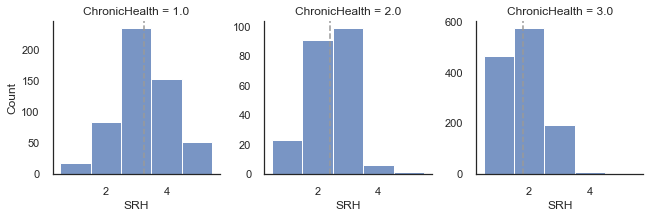

               ChronicHealth       SRH
ChronicHealth       1.000000 -0.607767
SRH                -0.607767  1.000000


In [17]:
g = sns.FacetGrid(df_model, col="ChronicHealth", sharey=False)
g.map_dataframe(sns.histplot, 'SRH',binwidth=1,binrange=[0.5,5.5])
    
g.map_dataframe(plot_mean)
g.set_axis_labels("SRH", "Count")
plt.show()

print(df_uk[['ChronicHealth','SRH']].corr(method='spearman'))

We won't be using any health related variables in our model. Let's have a look at the other variables.

We can use the seaborn `pairplot` function to plot multiple pairwise bivariate distributions in our dataset. This shows the relationship for all pair combination of variables in the DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

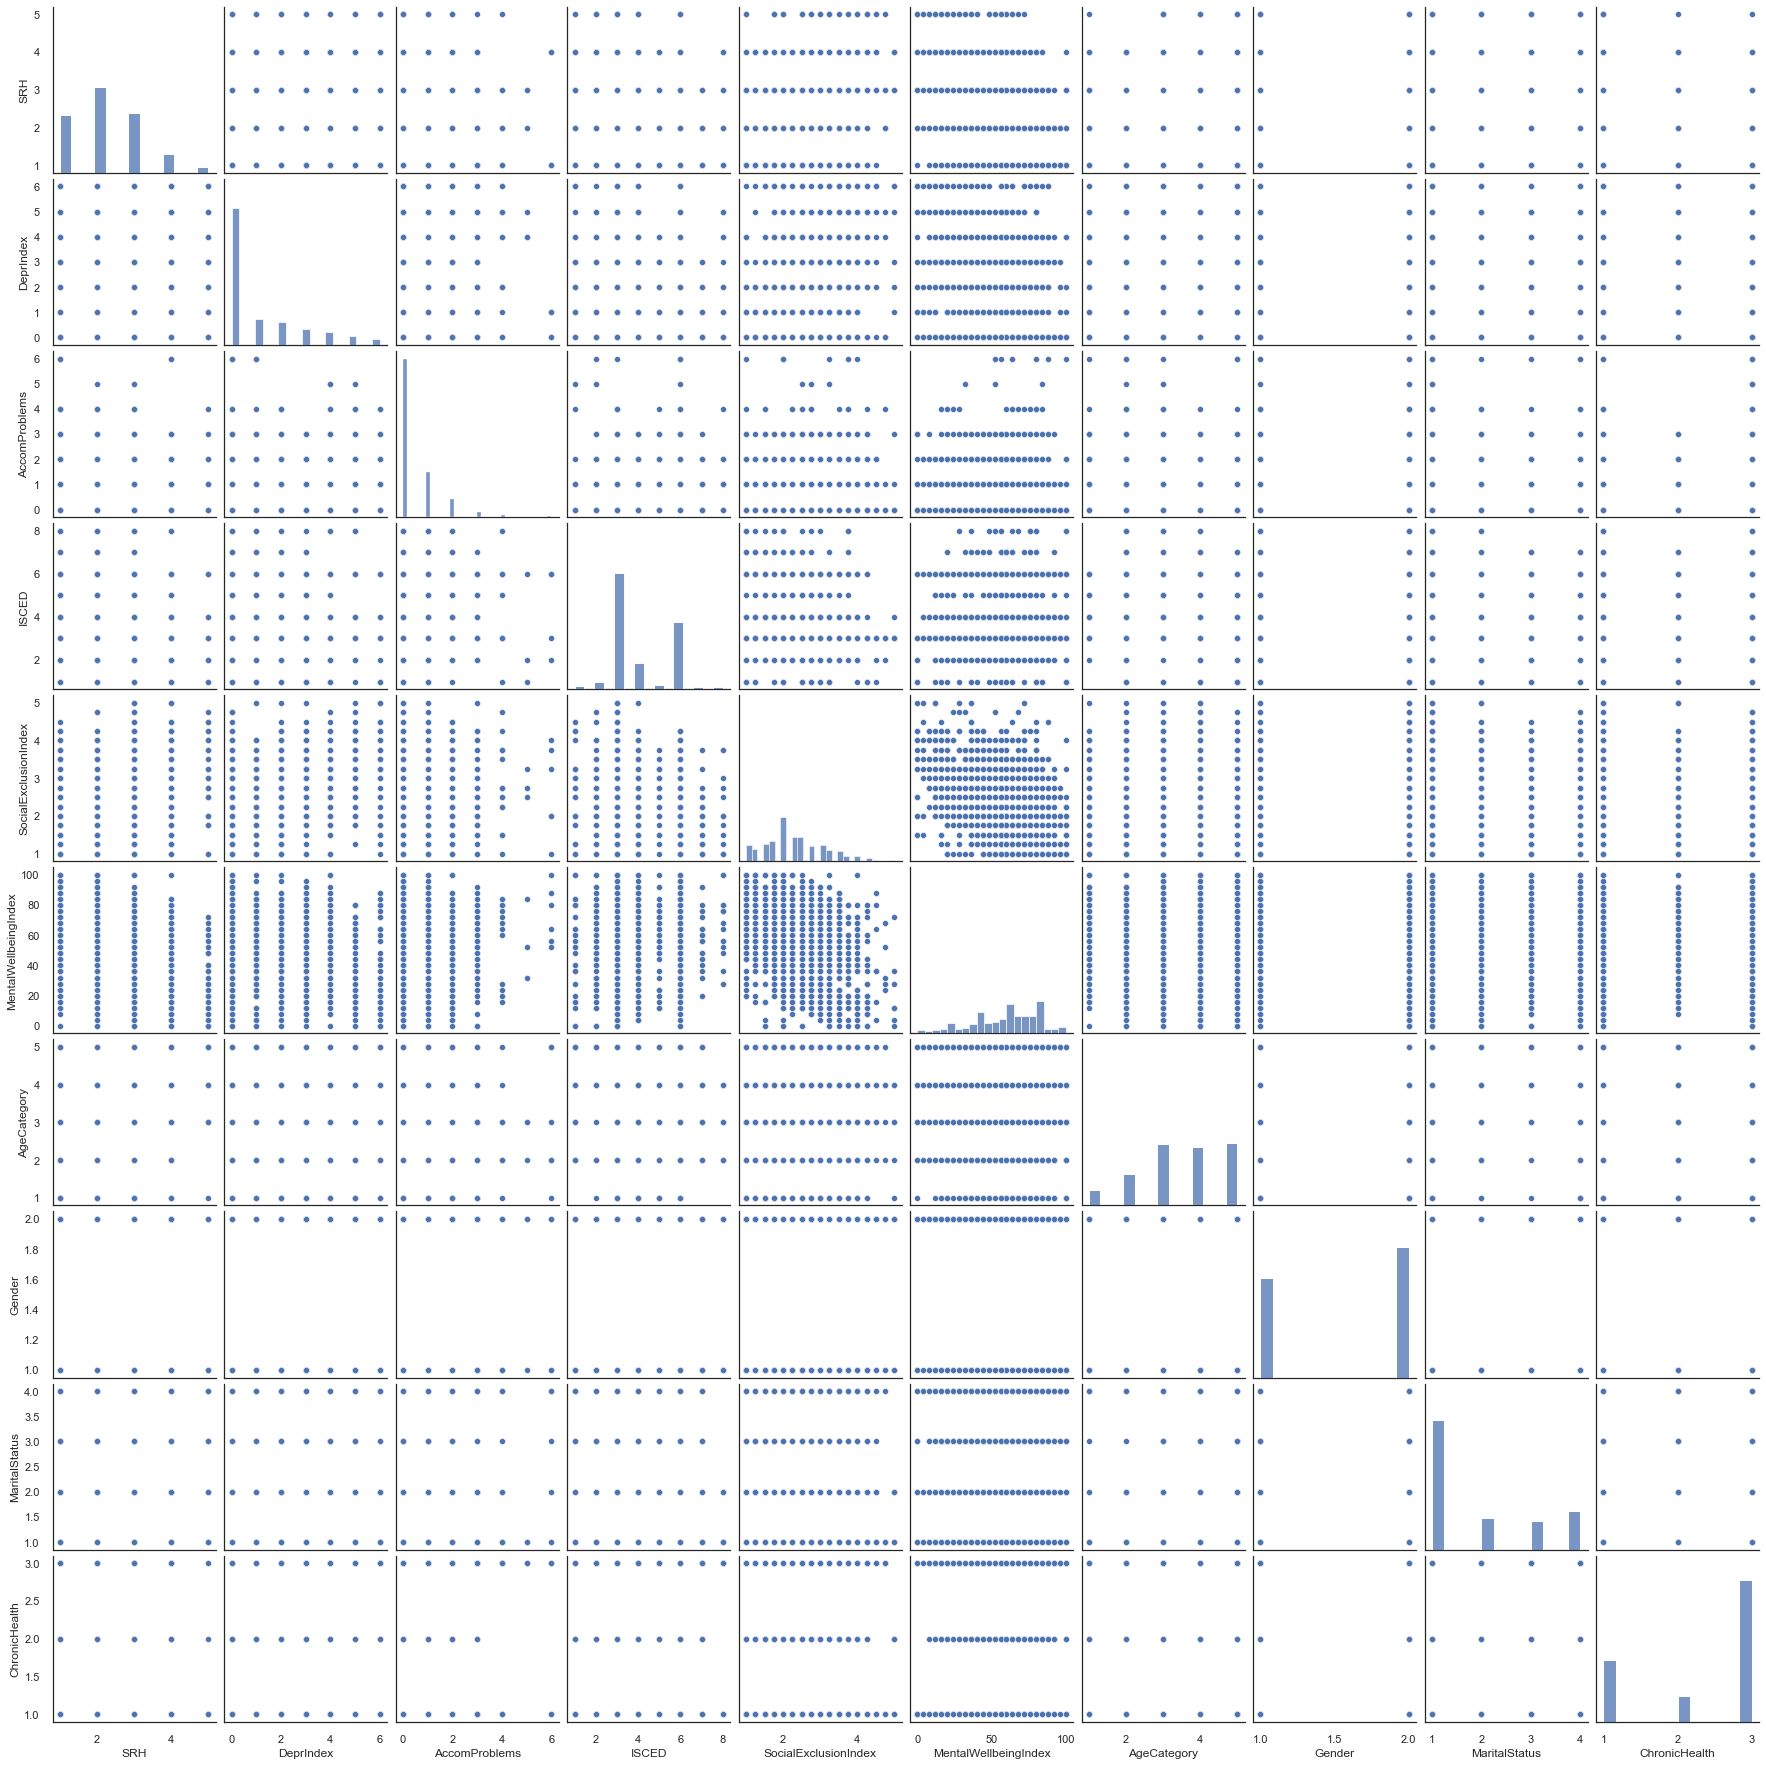

In [23]:
# to more easily to differences let's cap the correlation cmap
sns.pairplot(df_model[['SRH', 'DeprIndex', 'AccomProblems', 'ISCED', 'SocialExclusionIndex',
       'MentalWellbeingIndex', 'AgeCategory', 'Gender', 'MaritalStatus', 'ChronicHealth']])
plt.show()

As most our variables are ranks or categories, the plot matrix above might not be the best to visualise the relationships between variables. In this case is better to look at the rank correlations. Still, we take these with a pinch of salt because some of the variables are categorical rather than ordinal/numeric so the rank has little meaning (e.g. RuralUrban).  

Some initial observations on the below correlation matrix:

- Age correlates with a few variables. Especially SRH.
- Lots of variables correlate with SRH.
- DeprIndex, MentalWellbeing Index and Social Exclusion Index all correlate with one another.
- DeprIndex correlates with quite a few variables (SRH, AccomProblems, Education). 


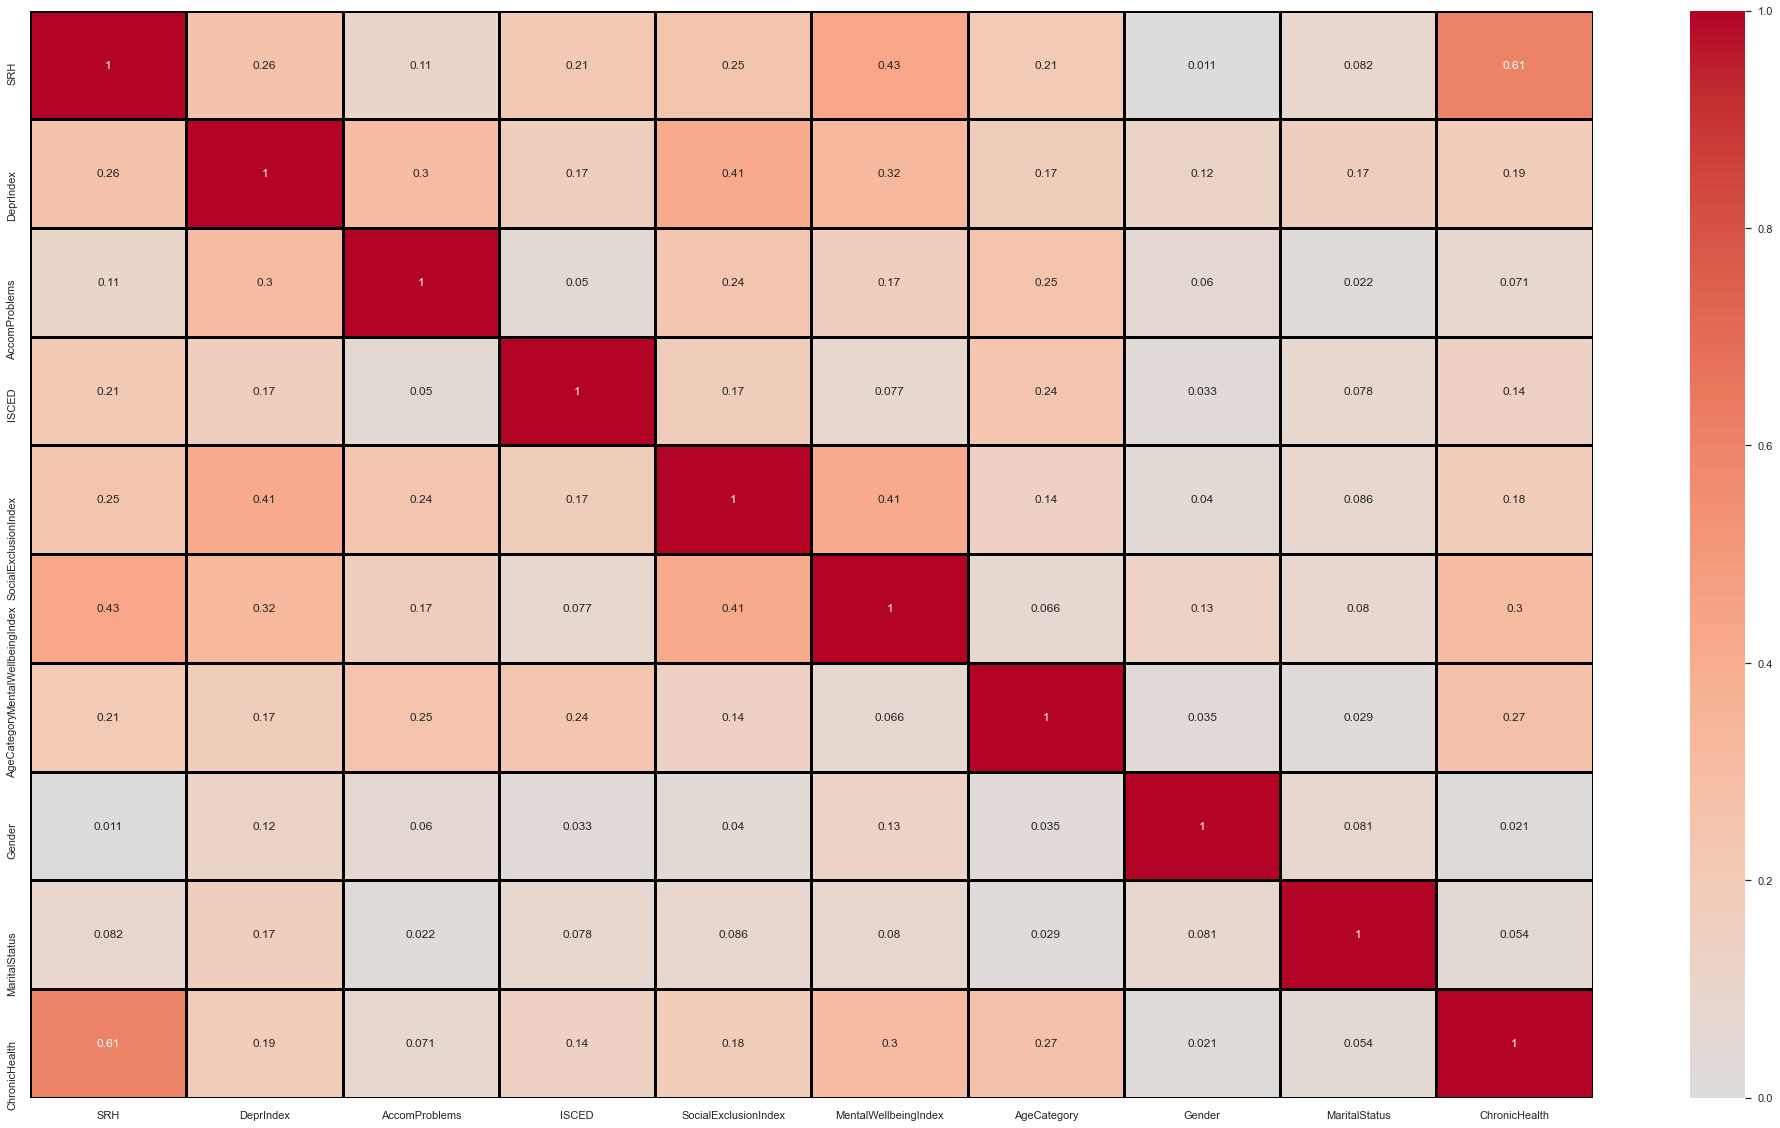

In [24]:
# to more easily to differences let's cap the correlation cmap
f, axes = plt.subplots(figsize =(35,20))

sns.heatmap(abs(df_model.drop(columns=['Country']).corr(method='spearman')), annot = True, vmin=0, vmax=1, center= 0., linewidths=3, linecolor='black',cmap= 'coolwarm')

plt.show()

Next we can go through each loose grouping of _material_, _occupational_ and _psychosocial_ to assess the suitability of variables to include in our model.

### Material variables

Let's examine the extent to which the _material_ variables `DeprIndex` and `AccomProblems` are representing similar things.

In [ ]:
df_mat = df_model[['DeprIndex','AccomProblems']]
print(df_mat.corr(method='spearman'))

AccomProblems    0.0    1.0   2.0   3.0  4.0  5.0  6.0
DeprIndex                                             
0.0            940.0  188.0  43.0  15.0  2.0  NaN  3.0
1.0            145.0   49.0  17.0   7.0  1.0  NaN  3.0
2.0            115.0   43.0  29.0   5.0  4.0  NaN  NaN
3.0             66.0   44.0  27.0   6.0  NaN  NaN  NaN
4.0             52.0   32.0  23.0   5.0  2.0  2.0  NaN
5.0             28.0   22.0  11.0   7.0  5.0  1.0  NaN
6.0             30.0   15.0   6.0   3.0  2.0  NaN  NaN


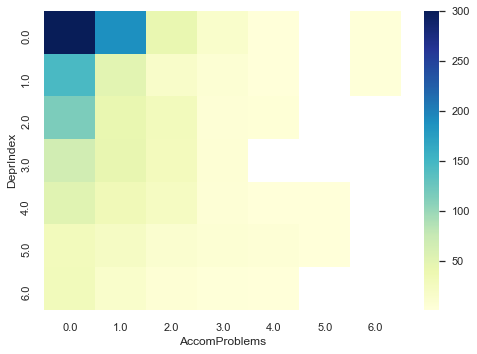

In [25]:
df_mat=df_model[['DeprIndex','AccomProblems']].groupby(by=['DeprIndex','AccomProblems']).size().reset_index(name='counts')
df_mat = df_mat.pivot("DeprIndex", "AccomProblems", "counts")
print(df_mat)
# 0,0 will overwhelm the heatmap. Let's cap it.
sns.heatmap(df_mat, cmap="YlGnBu", vmax=300)
plt.show()

There is a bias for zero accommodation problems but as deprivation increases the amount of accommodation problems tends to increase.

### Self reported health for the UK

One thing we haven't done so far is have a look at the full SRH distribution for the UK. 

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=df_uk, x='SRH', ax=axes[0],binwidth=1,binrange=[0.5,5.5])
sns.histplot(data=df_uk, x='DeprIndex', ax=axes[1],binwidth=1,binrange=[0.5,6.5])
plt.show()

You can see that in the UK dataset, as with the global dataset, most of `DeprIndex` responses were zero (right graph above). In the left panel we have SRH. The responses here are:
- 1: Very good
- 2: Good
- 3: Fair
- 4: Bad
- 5: Very Bad.  

The positive skew (i.e. the mean will be to the right of the median) shows that participants felt more healthy than unhealthy. 

The paper uses the 2003 EQLS dataset which has the answers of ["excellent”, “very good”, “good”, “fair”, “poor”]. The variable was dichotomised for ease of use with logistic regression as “good” health ["excellent", "very good", "good"] and “poor” health ["fair", "poor"]. 

Here we have different names of the responses. If we must dichotomise then the debate is around whether to categorise "fair" as good or bad health, since arguably the word semantically means good health rather than poor health. Let's follow the paper and have a 3-2 split with ("bad", "very bad") comprising the negative group.